In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.shape

(2000, 2)

In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,neg,
freq,1000,27


In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

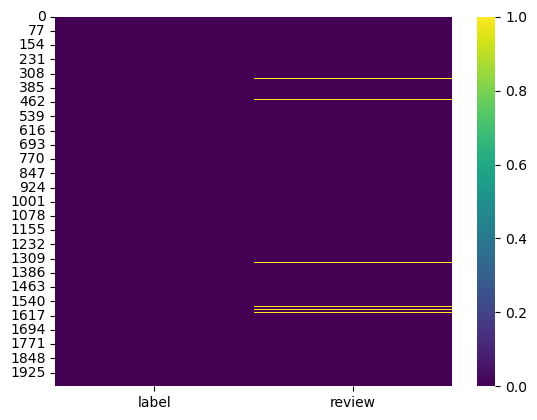

In [10]:
sns.heatmap(df.isnull(), cmap = 'viridis')

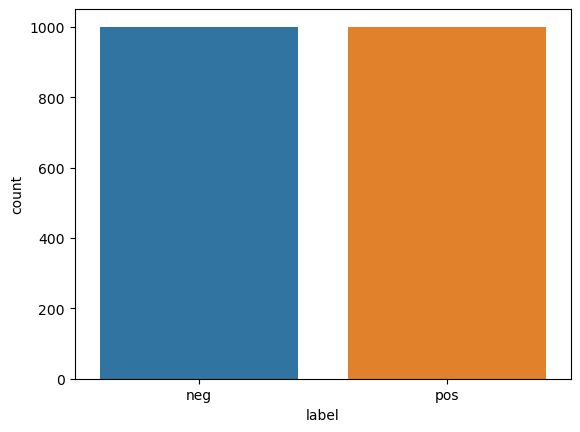

In [11]:
sns.countplot(data = df, x = 'label');

In [12]:
df.dropna(axis = 0,subset = 'review',inplace = True)

In [13]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [14]:
df['review'].str.isspace().sum()

27

In [15]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [16]:
index = df[df['review'].str.isspace()].index

In [17]:
df.drop(labels = index,axis = 0, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [19]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [21]:
for_pos = df[df['label'] == 'pos']

In [22]:
for_neg = df[df['label'] == 'neg']

In [23]:
cv = CountVectorizer(stop_words = 'english')

In [24]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [25]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
X = df['review']

In [28]:
y = df['label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [31]:
pipe = Pipeline([('tfid',TfidfVectorizer()), ('nv', MultinomialNB())])

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('nv', MultinomialNB())])

In [33]:
pipe_pred = pipe.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [35]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



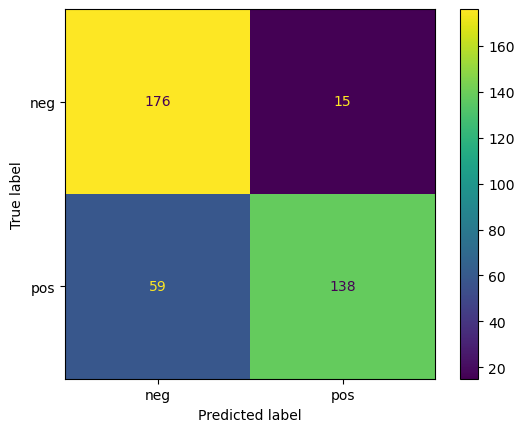

In [36]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test);

In [62]:
pipe.predict(['The movie is good'])

array(['pos'], dtype=object)

In [48]:
pipe_svc = Pipeline([('tfid',TfidfVectorizer()), ('svc', SVC())])

In [49]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('svc', SVC())])

In [50]:
pipe_pred_svc = pipe_svc.predict(X_test)

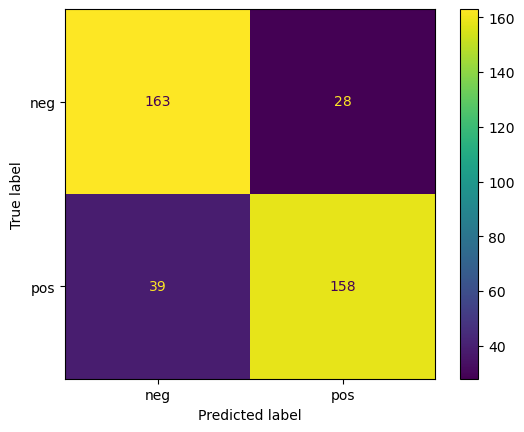

In [51]:
ConfusionMatrixDisplay.from_estimator(pipe_svc,X_test,y_test);

In [64]:
pipe_svc.predict(['the movie was bad'])

array(['neg'], dtype=object)